In [1]:
# !conda install seaborn -y

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path1 = "/home/ubuntu/llm-sr/ablation_results_foundry/logs/exp17/" # 14
path2 = "/home/ubuntu/llm-sr/ablation_results_foundry/logs/exp15/" # 15
path3 = "/home/ubuntu/llm-sr/ablation_results_foundry/logs/exp16/" # 16
path4 = "/home/ubuntu/llm-sr/ablation_results_foundry/logs/exp1/"
path5 = "/home/ubuntu/llm-sr/ablation_results_foundry/logs/exp0/"
path6 = "/home/ubuntu/llm-sr/ablation_results_foundry/logs/exp18/"

# NOTE: do one graph w/ path2 - 5 and then one with path 1 + 2 and 5
left_tasks = {
    # path1: "Llama3 - 0.1% - Hints",
    path2: "Llama3 - 0.1%",
    path3: "Llama3 - 0.1% - No Concept Evol",
    path4: "Llama3 - 0.1% - No Vars",
    path5: "PySR",
    path6: "Llama3 - 0.1% - No Concept Crossover",
}

right_tasks = {
    path1: "Llama3 - 0.1% - Hints",
    path2: "Llama3 - 0.1%",
    # path3: "Llama3 - 0.1% - No Concept Evol",
    # path4: "Llama3 - 0.1% - No Vars",
    path5: "PySR",
    # path6: "Llama3 - 0.1% - No Concept Crossover",
}

colors_assignment = {p : i for i, p in enumerate(left_tasks.keys() | right_tasks.keys())}

FileNotFoundError: [Errno 2] No such file or directory: '/home/ubuntu/llm-sr/ablation_results_foundry/logs/exp15/0/n_iterations.txt'

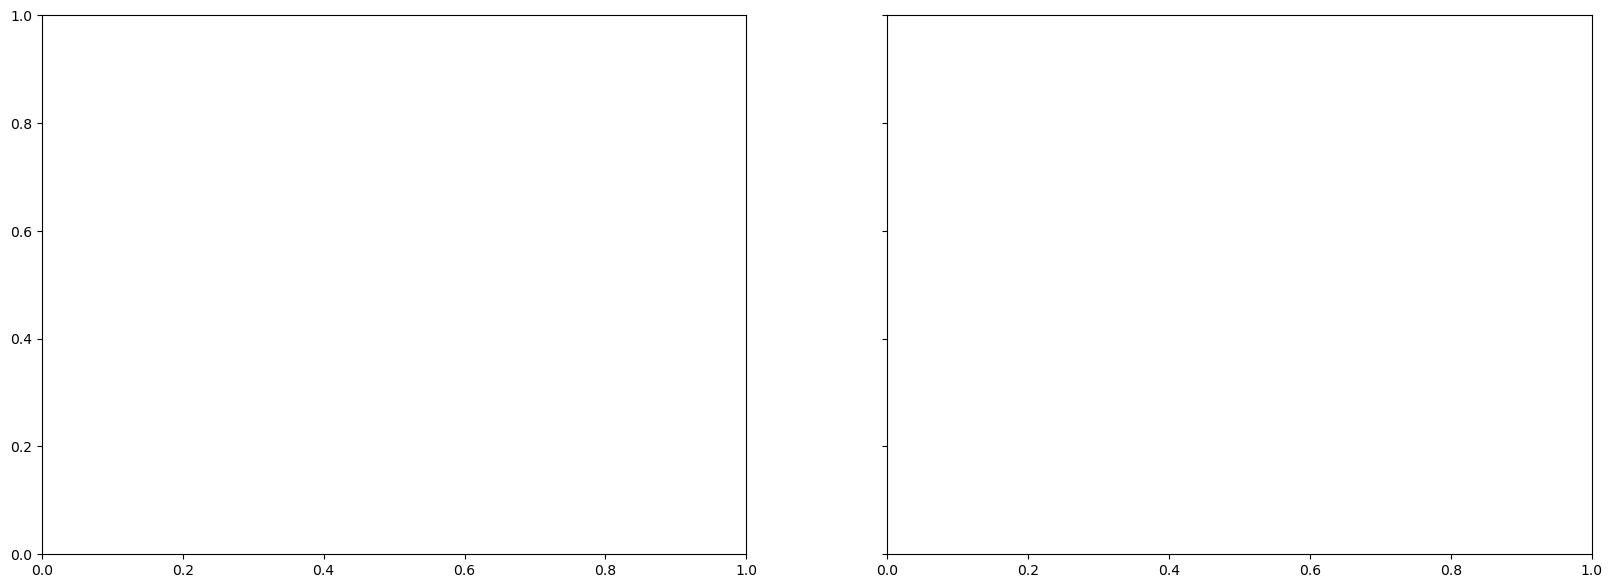

In [3]:
num_steps = 40
num_eq = 100

def process(path, N=100):
    out = dict()
    for i in range(N):
        file = open(path + str(i) + "/n_iterations.txt", "r")
        lines = file.readlines()

        if len(lines) < 4:
            res = ' '
        else:
            res = lines[3]

        if res[0] != '-':
            res = 1
        else:
            res = int(res[1:].strip())

        if res not in out:
            out[res] = 0
        out[res] += 1

        file.close()

    y = list()
    x = 0
    for v in range(num_steps):
        if v in out:
            x += out[v]
        y.append(x)
    return y

fig, ax = plt.subplots(1, 2, figsize=(20,7), dpi=100, sharey=True)

markers = ['o',  '>', 'p', 'h', '*', 's', 'd', 'v', '^', '<']

stepsize = 3

# colors = sns.color_palette("colorblind", len(set(left_tasks.keys()).union(set(right_tasks.keys()))))

colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#dede00', '#984ea3',
                  '#999999', '#e41a1c', ]

for t, tasks in enumerate([left_tasks, right_tasks]):
    for i, x in enumerate(tasks):
        y_values = process(x, N=num_eq)
        ax[t].plot(
            list(range(num_steps)), 
            y_values, 
            label=tasks[x], 
            color=colors[colors_assignment[x]],
            linewidth=3
        )
        ax[t].plot(
            list(range(0, num_steps, stepsize)),
            y_values[0:num_steps:stepsize],
            color=colors[colors_assignment[x]],
            marker=markers[colors_assignment[x] % len(markers)], 
            linestyle='None', 
            # label=tasks[x], 
            markersize=10
        )

    ax[t].set_ylim(0, num_eq)
    ax[t].set_xlim(0, num_steps )
    ax[t].grid(True, which='both', linestyle='--', linewidth=0.25)
    ax[t].tick_params(axis='both', which='major', labelsize=20)
# ax[t].legend(fontsize=18, loc='upper left', title='Tasks', title_fontsize='20')
# share legend
# ax[t].legend(fontsize=18, loc='upper left', title='Tasks', title_fontsize='20')

ax[0].set_xlabel("Iterations", fontsize=26, fontweight='bold')
ax[1].set_xlabel("Iterations", fontsize=26, fontweight='bold')
ax[0].set_ylabel("Equations Solved under MSE", fontsize=26, fontweight='bold')

handles, labels = ax[0].get_legend_handles_labels()
handles2, labels2 = ax[1].get_legend_handles_labels()

all_handles = dict()
for h, l in zip(handles, labels):
    all_handles[l] = h
for h, l in zip(handles2, labels2):
    all_handles[l] = h

labels, handles = zip(*all_handles.items())
fig.legend(handles, labels, loc='upper center', fontsize=22, ncol=3, bbox_to_anchor=(0.50, 1.15))

plt.tight_layout()
# plt.savefig("iter_graph.png", format='png')
plt.savefig("iter_graph.pdf", format='pdf', bbox_inches='tight', pad_inches=0)
plt.show()

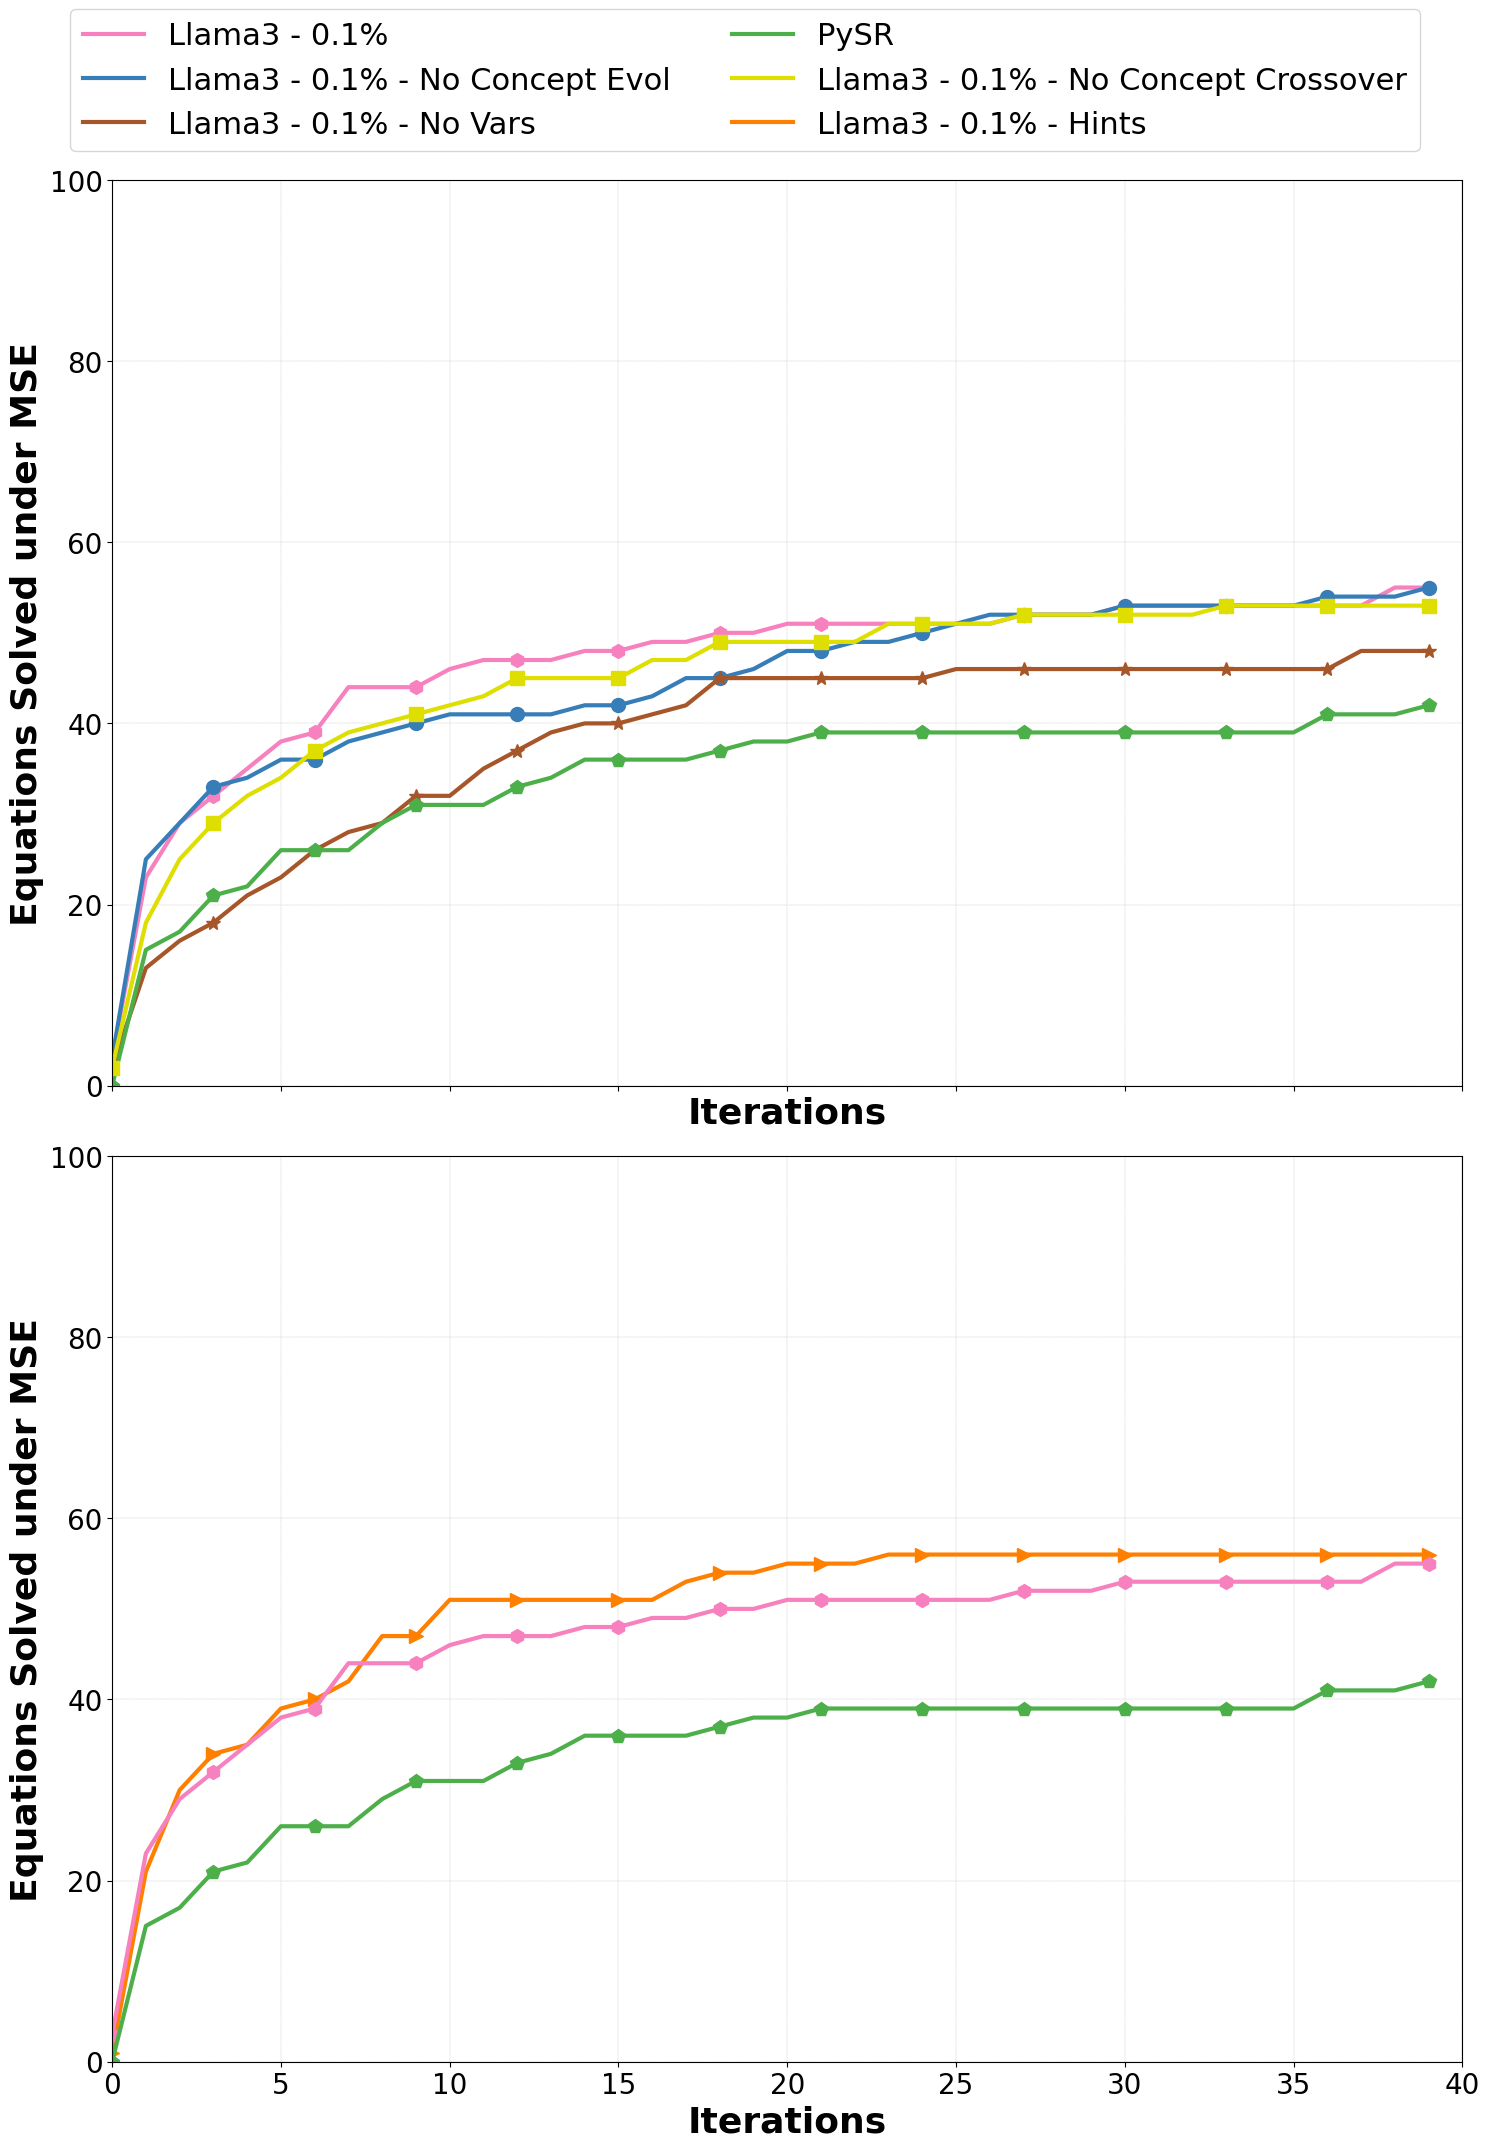

In [20]:
num_steps = 40
num_eq = 100

def process(path, N=100):
    out = dict()
    for i in range(N):
        file = open(path + str(i) + "/n_iterations.txt", "r")
        lines = file.readlines()

        if len(lines) < 4:
            res = ' '
        else:
            res = lines[3]

        if res[0] != '-':
            res = 1
        else:
            res = int(res[1:].strip())

        if res not in out:
            out[res] = 0
        out[res] += 1

        file.close()

    y = list()
    x = 0
    for v in range(num_steps):
        if v in out:
            x += out[v]
        y.append(x)
    return y

fig, ax = plt.subplots(2, 1, figsize=(15,20), dpi=100, sharex=True)

markers = ['o',  '>', 'p', 'h', '*', 's', 'd', 'v', '^', '<']

stepsize = 3

# colors = sns.color_palette("colorblind", len(set(left_tasks.keys()).union(set(right_tasks.keys()))))

colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#dede00', '#984ea3',
                  '#999999', '#e41a1c', ]

for t, tasks in enumerate([left_tasks, right_tasks]):
    for i, x in enumerate(tasks):
        y_values = process(x, N=num_eq)
        ax[t].plot(
            list(range(num_steps)), 
            y_values, 
            label=tasks[x], 
            color=colors[colors_assignment[x]],
            linewidth=3
        )
        ax[t].plot(
            list(range(0, num_steps, stepsize)),
            y_values[0:num_steps:stepsize],
            color=colors[colors_assignment[x]],
            marker=markers[colors_assignment[x] % len(markers)], 
            linestyle='None', 
            # label=tasks[x], 
            markersize=10
        )

    ax[t].set_ylim(0, num_eq)
    ax[t].set_xlim(0, num_steps )
    ax[t].grid(True, which='both', linestyle='--', linewidth=0.25)
    ax[t].tick_params(axis='both', which='major', labelsize=20)
# ax[t].legend(fontsize=18, loc='upper left', title='Tasks', title_fontsize='20')
# share legend
# ax[t].legend(fontsize=18, loc='upper left', title='Tasks', title_fontsize='20')

ax[0].set_xlabel("Iterations", fontsize=26, fontweight='bold')
ax[1].set_xlabel("Iterations", fontsize=26, fontweight='bold')
ax[0].set_ylabel("Equations Solved under MSE", fontsize=26, fontweight='bold')
ax[1].set_ylabel("Equations Solved under MSE", fontsize=26, fontweight='bold')

handles, labels = ax[0].get_legend_handles_labels()
handles2, labels2 = ax[1].get_legend_handles_labels()

all_handles = dict()
for h, l in zip(handles, labels):
    all_handles[l] = h
for h, l in zip(handles2, labels2):
    all_handles[l] = h

labels, handles = zip(*all_handles.items())
fig.legend(handles, labels, loc='upper center', fontsize=22, ncol=2, bbox_to_anchor=(0.50, 1.08))

plt.tight_layout()
# plt.savefig("iter_graph.png", format='png')
plt.savefig("iter_graph_vert.pdf", format='pdf', bbox_inches='tight', pad_inches=0)
plt.show()